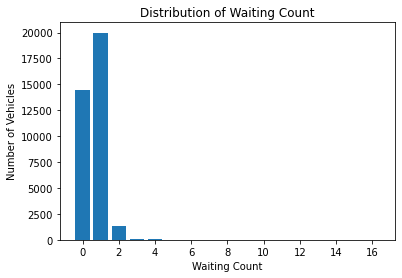

In [1]:
#Distribución de Waiting Count

import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import statistics

def extraer_waiting_count(filename):
    tree = ET.parse(filename)
    root = tree.getroot()

    waiting_counts = [int(trip.get('waitingCount')) for trip in root.findall('tripinfo')]
    return waiting_counts

def grafico_barras(datos, output_filename):
    freq = {}
    for count in datos:
        if count in freq:
            freq[count] += 1
        else:
            freq[count] = 1

    sorted_counts = sorted(freq.keys())

    ax = plt.figure().gca()  # Obtiene el contexto actual de los ejes
    ax.bar(sorted_counts, [freq[count] for count in sorted_counts])
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))

    plt.xlabel('Waiting Count')
    plt.ylabel('Number of Vehicles')
    plt.title('Distribution of Waiting Count')
    plt.savefig(output_filename, bbox_inches='tight')
    plt.show()  # Muestra el gráfico

def escribir_estadisticas(filename, media, desviacion):
    with open(filename, 'w') as file:
        file.write(f"Media de waiting_count: {media:.2f}\n")
        file.write(f"Desviación estándar de waiting_count: {desviacion:.2f}\n")

if __name__ == "__main__":
    filename = "tripinfo.xml"
    datos = extraer_waiting_count(filename)

    # Calcular la media y la desviación estándar
    media = statistics.mean(datos)
    desviacion = statistics.stdev(datos)

    # Escribir la media y la desviación estándar en un archivo
    escribir_estadisticas("estadisticas.txt", media, desviacion)

    # Construir el nombre del archivo PNG basado en el nombre del archivo XML
    output_filename = 'Waiting_Count_Distribution.png'
    grafico_barras(datos, output_filename)


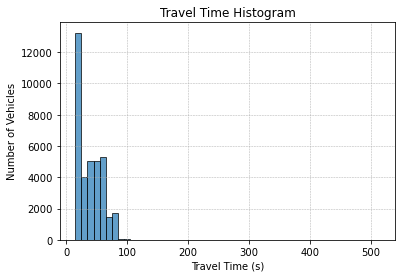

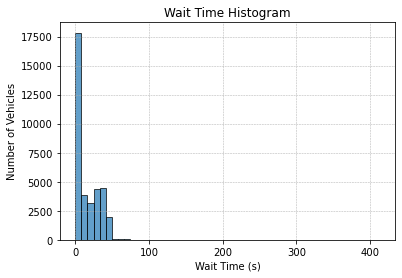

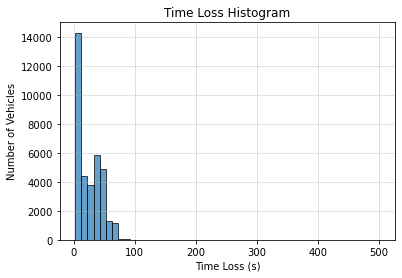

<Figure size 432x288 with 0 Axes>

In [2]:
#Distribución y estadísticas de  travel_times,  wait_times, time_losses
     

import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
import statistics

def extract_data(filename):
    tree = ET.parse(filename)
    root = tree.getroot()

    travel_times = [float(trip.get('duration')) for trip in root.findall('tripinfo')]
    wait_times = [float(trip.get('waitingTime')) for trip in root.findall('tripinfo')]
    time_losses = [float(trip.get('timeLoss')) for trip in root.findall('tripinfo')]

    return travel_times, wait_times, time_losses

def visualize_histogram(data, title, xlabel, ylabel, output_filename):
    plt.hist(data, bins=50, edgecolor="k", alpha=0.7)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)
    
    # Guardar el gráfico en formato PNG
    plt.savefig(output_filename + '.png', bbox_inches='tight')
    plt.show()  # Muestra el gráfico
    plt.clf()  # Limpia la figura para la siguiente visualización

def write_statistics_to_file(filename, travel_times, wait_times, time_losses):
    with open(filename, 'w') as f:
        f.write(f"Media de travel_times: {statistics.mean(travel_times):.2f}\n")
        f.write(f"Desviación estándar de travel_times: {statistics.stdev(travel_times):.2f}\n")
        f.write(f"Media de wait_times: {statistics.mean(wait_times):.2f}\n")
        f.write(f"Desviación estándar de wait_times: {statistics.stdev(wait_times):.2f}\n")
        f.write(f"Media de time_losses: {statistics.mean(time_losses):.2f}\n")
        f.write(f"Desviación estándar de time_losses: {statistics.stdev(time_losses):.2f}\n")

def main():
    filename = 'tripinfo.xml'
    travel_times, wait_times, time_losses = extract_data(filename)

    # Visualizar y guardar los histogramas
    visualize_histogram(travel_times, "Travel Time Histogram", "Travel Time (s)", "Number of Vehicles", "Travel_Time_Histogram")
    visualize_histogram(wait_times, "Wait Time Histogram", "Wait Time (s)", "Number of Vehicles", "Wait_Time_Histogram")
    visualize_histogram(time_losses, "Time Loss Histogram", "Time Loss (s)", "Number of Vehicles", "Time_Loss_Histogram")

    # Escribir estadísticas en un archivo
    write_statistics_to_file("statistics_TT_WT_TL.txt", travel_times, wait_times, time_losses)

if __name__ == "__main__":
    main()


In [38]:
#Estadísticas vehículos especiales


import xml.etree.ElementTree as ET
import statistics

def extract_info(filename, vehicle_prefix):
    tree = ET.parse(filename)
    root = tree.getroot()

    vehicle_info_am = []
    vehicle_info_other = []
    for trip in root.findall('tripinfo'):
        vehicle_id = trip.get('id')
        info_vehiculo = {
            'id': vehicle_id,
            'waitingCount': int(trip.get('waitingCount')),
            'routeLength': float(trip.get('routeLength')),      # Longitud de la ruta en metros
            'duration': float(trip.get('duration')),            # Duración del viaje en segundos
            'arrivalTime': float(trip.get('arrival')),         # Tiempo de llegada al destino en segundos
            'timeLoss': float(trip.get('timeLoss')),            # Tiempo perdido en segundos
            'avgSpeed': float(trip.get('routeLength')) / float(trip.get('duration')),  # Velocidad media en metros por segundo
            'route': trip.get('route'),                         # Ruta del vehículo
            'departLane': trip.get('departLane'),               # Ruta de salida (departLane)
            'waitingTime': float(trip.get('waitingTime'))       # Tiempo de espera en segundos
            # Agrega más atributos según sea necesario
        }
        
        if vehicle_id.startswith(vehicle_prefix):
            vehicle_info_am.append(info_vehiculo)
        else:
            vehicle_info_other.append(info_vehiculo)

    return vehicle_info_am, vehicle_info_other

def calculate_average_params(vehicle_info):
    if not vehicle_info:
        return None
    
    avg_params = {
        'avg_waitingCount': statistics.mean(info['waitingCount'] for info in vehicle_info),
        'avg_routeLength': statistics.mean(info['routeLength'] for info in vehicle_info),
        'avg_duration': statistics.mean(info['duration'] for info in vehicle_info),
        'avg_arrivalTime': statistics.mean(info['arrivalTime'] for info in vehicle_info),
        'avg_timeLoss': statistics.mean(info['timeLoss'] for info in vehicle_info),
        'avg_avgSpeed': statistics.mean(info['avgSpeed'] for info in vehicle_info),
        'avg_waitingTime': statistics.mean(info['waitingTime'] for info in vehicle_info)
    }

    return avg_params

def write_params_to_file(avg_params, output_filename):
    with open(output_filename, 'w') as f:
        f.write("Parámetros promedio:\n")
        f.write(f"Promedio de Waiting Count: {avg_params['avg_waitingCount']:.2f}\n")
        f.write(f"Promedio de Duración: {avg_params['avg_duration']:.2f} segundos\n")
        f.write(f"Promedio de Tiempo de Llegada al Destino: {avg_params['avg_arrivalTime']:.2f} segundos\n")
        f.write(f"Promedio de Tiempo Perdido: {avg_params['avg_timeLoss']:.2f} segundos\n")
        f.write(f"Promedio de Velocidad Media: {avg_params['avg_avgSpeed']:.2f} metros por segundo\n")
        f.write(f"Promedio de Tiempo de Espera: {avg_params['avg_waitingTime']:.2f} segundos\n")

if __name__ == "__main__":
    filename = "tripinfo2750.xml"
    vehicle_prefix = "f_6"  # Prefix de ID de vehículo que deseas analizar

    info_vehiculos_am, info_vehiculos_other = extract_info(filename, vehicle_prefix)

    if info_vehiculos_am:
        avg_params_am = calculate_average_params(info_vehiculos_am)
        print("Parámetros promedio de vehículos con ID que comienza con 'f_6' ambulancies:")
        print(f"Promedio de Waiting Count: {avg_params_am['avg_waitingCount']:.2f}")
        print(f"Promedio de Duración: {avg_params_am['avg_duration']:.2f} segundos")
        print(f"Promedio de Tiempo de Llegada al Destino: {avg_params_am['avg_arrivalTime']:.2f} segundos")
        print(f"Promedio de Tiempo Perdido: {avg_params_am['avg_timeLoss']:.2f} segundos")
        print(f"Promedio de Velocidad Media: {avg_params_am['avg_avgSpeed']:.2f} metros por segundo")
        print(f"Promedio de Tiempo de Espera: {avg_params_am['avg_waitingTime']:.2f} segundos")
        write_params_to_file(avg_params_am, "avg_params_am.txt")
        
    if info_vehiculos_other:
        avg_params_other = calculate_average_params(info_vehiculos_other)
        print("\nParámetros promedio de vehículos con ID que no comienza con 'f_6':")
        print(f"Promedio de Waiting Count: {avg_params_other['avg_waitingCount']:.2f}")
        print(f"Promedio de Duración: {avg_params_other['avg_duration']:.2f} segundos")
        print(f"Promedio de Tiempo de Llegada al Destino: {avg_params_other['avg_arrivalTime']:.2f} segundos")
        print(f"Promedio de Tiempo Perdido: {avg_params_other['avg_timeLoss']:.2f} segundos")
        print(f"Promedio de Velocidad Media: {avg_params_other['avg_avgSpeed']:.2f} metros por segundo")
        print(f"Promedio de Tiempo de Espera: {avg_params_other['avg_waitingTime']:.2f} segundos")
        write_params_to_file(avg_params_other, "avg_params_other.txt")



Parámetros promedio de vehículos con ID que no comienza con 'f_6':
Promedio de Waiting Count: 0.64
Promedio de Duración: 37.95 segundos
Promedio de Tiempo de Llegada al Destino: 57669.47 segundos
Promedio de Tiempo Perdido: 23.37 segundos
Promedio de Velocidad Media: 6.14 metros por segundo
Promedio de Tiempo de Espera: 13.74 segundos


In [5]:
#Estadísticas de las rutas

import xml.etree.ElementTree as ET
import statistics

def extract_data(filename):
    tree = ET.parse(filename)
    root = tree.getroot()
    
    depart_lane_info = [(trip.get('departLane'), float(trip.get('waitingTime')), int(trip.get('waitingCount')),
                        float(trip.get('routeLength')), float(trip.get('duration')), float(trip.get('timeLoss')))
                        for trip in root.findall('tripinfo')]
    
    arrival_lane_info = [(trip.get('arrivalLane'), float(trip.get('waitingTime')), int(trip.get('waitingCount')),
                        float(trip.get('routeLength')), float(trip.get('duration')), float(trip.get('timeLoss')))
                        for trip in root.findall('tripinfo')]

    return depart_lane_info, arrival_lane_info

def calculate_statistics(lane_info):
    lane_stats = {}
    for lane, waiting_time, waiting_count, route_length, travel_time, time_loss in lane_info:
        if lane not in lane_stats:
            lane_stats[lane] = {'count': 0, 'total_wait': 0, 'total_waiting_count': 0, 
                                'total_route_length': 0, 'total_travel_time': 0, 'total_time_loss': 0}
        stats = lane_stats[lane]
        stats['count'] += 1
        stats['total_wait'] += waiting_time
        stats['total_waiting_count'] += waiting_count
        stats['total_route_length'] += route_length
        stats['total_travel_time'] += travel_time
        stats['total_time_loss'] += time_loss
    
    # Calculate averages for each lane
    for stats in lane_stats.values():
        stats['avg_wait'] = stats['total_wait'] / stats['count']
        stats['avg_waiting_count'] = stats['total_waiting_count'] / stats['count']
        stats['avg_speed'] = stats['total_route_length'] / stats['total_travel_time'] if stats['total_travel_time'] > 0 else 0
        stats['avg_time_loss'] = stats['total_time_loss'] / stats['count']

    return lane_stats

def print_statistics(lane_stats, lane_type):
    print(f"Statistics for {lane_type}:")
    for lane, stats in lane_stats.items():
        print(f"{lane_type.capitalize()}: {lane}")
        print(f"Number of cars: {stats['count']}")
        print(f"Average wait time: {stats['avg_wait']:.2f} seconds")
        print(f"Average waiting count: {stats['avg_waiting_count']:.2f}")
        print(f"Average speed: {stats['avg_speed']:.2f} meters/second")
        print(f"Average time loss: {stats['avg_time_loss']:.2f} seconds\n")

def main():
    filename = 'tripinfo10000.xml'
    depart_lane_info, arrival_lane_info = extract_data(filename)

    # Statistics for DepartLane
    depart_stats = calculate_statistics(depart_lane_info)
    print_statistics(depart_stats, "departLane")

    # Statistics for ArrivalLane
    arrival_stats = calculate_statistics(arrival_lane_info)
    print_statistics(arrival_stats, "arrivalLane")

if __name__ == "__main__":
    main()


Statistics for departLane:
Departlane: sud_nord_1
Number of cars: 1236
Average wait time: 24.21 seconds
Average waiting count: 1.08
Average speed: 3.75 meters/second
Average time loss: 44.89 seconds

Departlane: nord_sud_1
Number of cars: 1070
Average wait time: 57.99 seconds
Average waiting count: 2.33
Average speed: 2.14 meters/second
Average time loss: 83.79 seconds

Departlane: oest_est_1
Number of cars: 2100
Average wait time: 15.00 seconds
Average waiting count: 0.78
Average speed: 5.06 meters/second
Average time loss: 32.10 seconds

Departlane: est_oest_1
Number of cars: 1000
Average wait time: 13.96 seconds
Average waiting count: 0.66
Average speed: 5.27 meters/second
Average time loss: 30.56 seconds

Statistics for arrivalLane:
Arrivallane: -sud_nord_1
Number of cars: 429
Average wait time: 19.76 seconds
Average waiting count: 0.84
Average speed: 4.09 meters/second
Average time loss: 40.07 seconds

Arrivallane: -nord_sud_1
Number of cars: 605
Average wait time: 18.18 seconds
A